In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# tensorflow -> (production) , keras and pytorch -> (research)

In [3]:
import tensorflow as  tf
# tensorflow is internally written in c++

In [4]:
tf.__version__

'2.17.0'

In [5]:
# get fashion MNIST Dataset from tensorflow datasets

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
len(fashion_mnist)

2

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
y_train_full.shape

(60000,)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle/boot"]

In [12]:
X_train, X_val = X_train_full[:50000], X_train_full[50000:]
y_train, y_val = y_train_full[:50000], y_train_full[50000:]

In [13]:
X_train.shape

(50000, 28, 28)

In [14]:
y_train.shape

(50000,)

In [15]:
X_train = X_train / 255

In [16]:
X_train.max()

1.0

In [17]:
X_train[0] # 0-255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

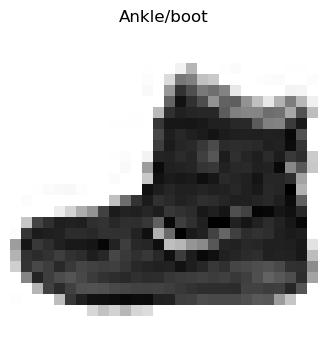

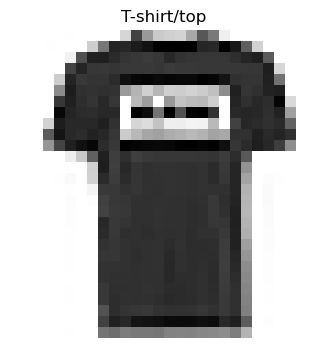

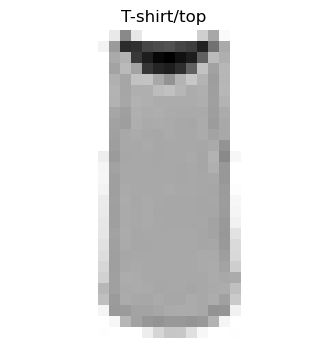

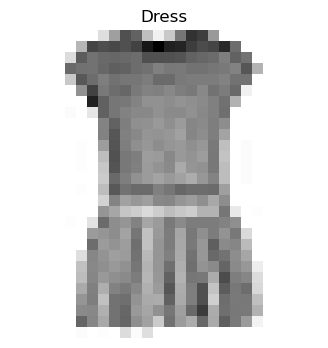

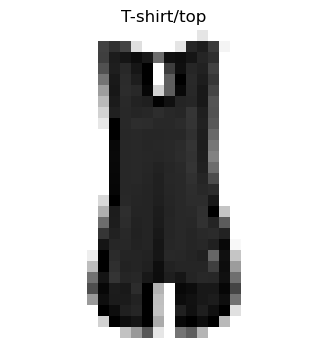

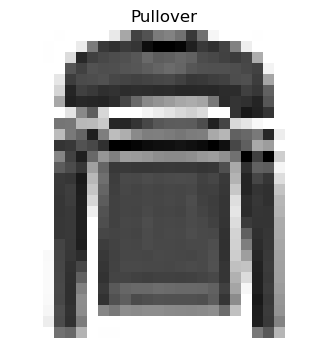

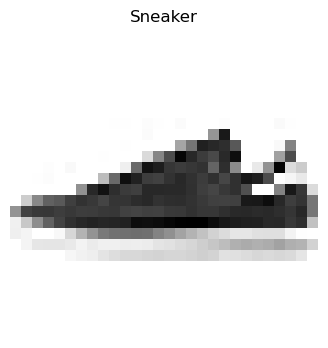

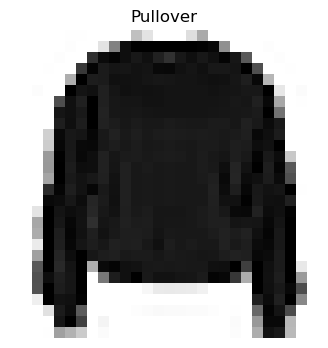

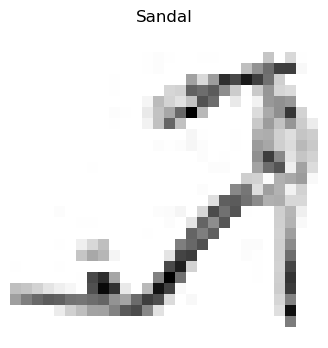

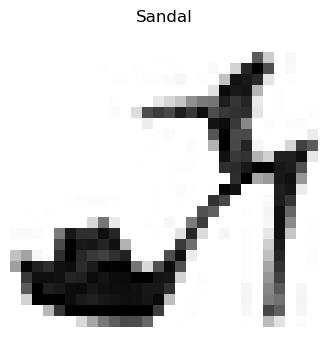

In [18]:
for i in range(10):
    plt.figure(figsize=(4,4))
    plt.imshow(X_train[i], cmap='binary')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
    plt.show()

In [19]:
N = 25
im = np.r_[ *[np.c_[ *[X_train[i*j] for i in range(N) ] ] for j in range(N)]]

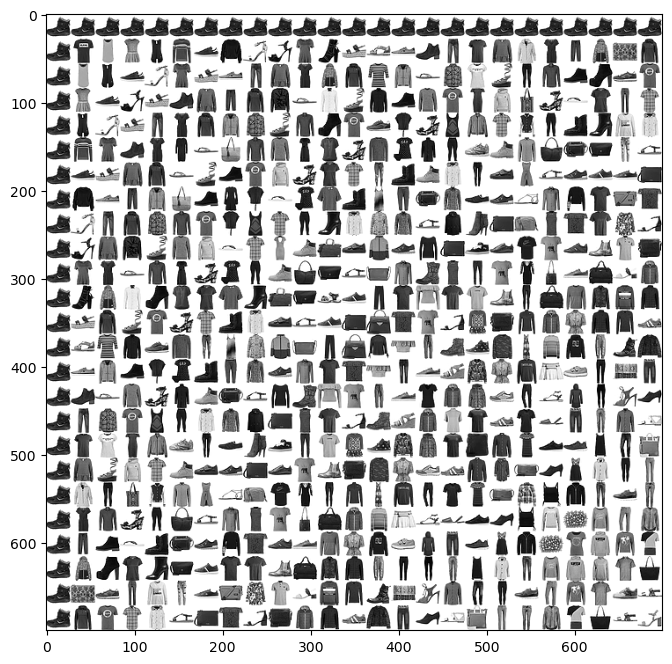

In [20]:
plt.figure(figsize=(12,8))
plt.imshow(im, cmap='binary')
plt.show()

In [21]:
# Let's create a simple sequential model

In [22]:
tf.random.set_seed(190)

In [23]:
model = tf.keras.Sequential()

        model.add(layer)
        mxn   ->  input  --->  n(features)
        mx28x28

In [24]:
model.add(tf.keras.Input(shape=[28,28]))

In [25]:
# hidden layer
model.add(tf.keras.layers.Flatten())  # 784 features
# Normalization, Log, exp Transformation

In [26]:
model.add(tf.keras.layers.Dense(100, activation='relu')) 
# 1 perceptron -> (784 + 1) * 100 -> 78500 -> trainable params

In [27]:
model.add(tf.keras.layers.Dense(100, activation='relu'))
# 1 perceptron -> (100 + 1) * 100 -> 10100 -> trainable params

In [28]:
# output layer
# activation function -> softmax 
# softmax predicts probability of each class
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# 1 perceptron -> (100 + 1) * 10 -> 1010 -> trainable params

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2),
    metrics = ["accuracy"]
)

In [31]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6477 - loss: 1.1214 - val_accuracy: 0.7886 - val_loss: 67.3730
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8189 - loss: 0.5240 - val_accuracy: 0.8090 - val_loss: 67.2981
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8367 - loss: 0.4662 - val_accuracy: 0.8174 - val_loss: 68.0604
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8466 - loss: 0.4358 - val_accuracy: 0.8227 - val_loss: 68.7401
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8525 - loss: 0.4145 - val_accuracy: 0.8273 - val_loss: 68.3792
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8584 - loss: 0.3980 - val_accuracy: 0.8293 - val_loss: 67.9885
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8621 - loss: 0.3842 - val_accuracy: 0.8318 - val_loss: 67.7154
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8670 - loss: 0.

In [32]:
X_val.shape

(10000, 28, 28)

In [33]:
result = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 65.0211


In [34]:
X_new = X_test[:3]

In [35]:
y_new = model.predict(X_new).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [36]:
np.argmax(y_new, axis=1)

array([9, 2, 1], dtype=int64)

In [37]:
y_new_class = list(np.array(class_names)[np.argmax(y_new, axis=1)])

In [38]:
y_new_class

['Ankle/boot', 'Pullover', 'Trouser']

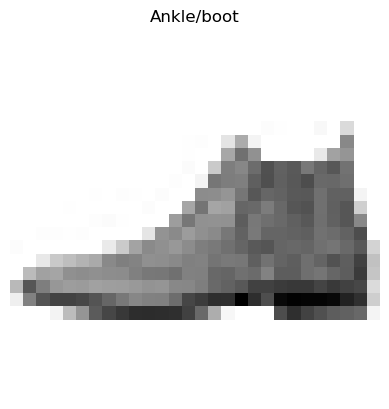

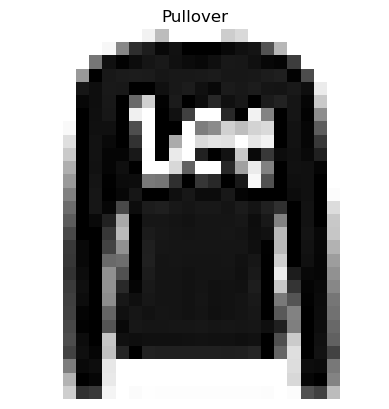

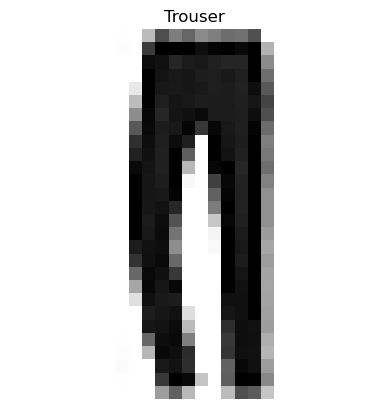

In [39]:
for i in range(3):
    plt.imshow(X_test[i], cmap='binary')
    plt.title(y_new_class[i])
    plt.axis('off')
    plt.show()

In [40]:
history.history

{'accuracy': [0.742680013179779,
  0.8228399753570557,
  0.8393599987030029,
  0.8491600155830383,
  0.8553799986839294,
  0.861299991607666,
  0.8654599785804749,
  0.8695200085639954,
  0.8725600242614746,
  0.8753799796104431,
  0.8774600028991699,
  0.8795599937438965,
  0.8820199966430664,
  0.8849400281906128,
  0.8867599964141846,
  0.8890200257301331,
  0.8907399773597717,
  0.8924599885940552,
  0.8943399786949158,
  0.8962399959564209,
  0.8975600004196167,
  0.898639976978302,
  0.899619996547699,
  0.9013000130653381,
  0.9024800062179565,
  0.9040200114250183,
  0.905460000038147,
  0.9063000082969666,
  0.9075199961662292,
  0.9089599847793579],
 'loss': [0.7899839878082275,
  0.5084998607635498,
  0.45933645963668823,
  0.4312160015106201,
  0.410908579826355,
  0.39471766352653503,
  0.38120633363723755,
  0.3696343004703522,
  0.3595324754714966,
  0.3506622910499573,
  0.34246987104415894,
  0.3350725471973419,
  0.3281778395175934,
  0.32181647419929504,
  0.31584152

In [41]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

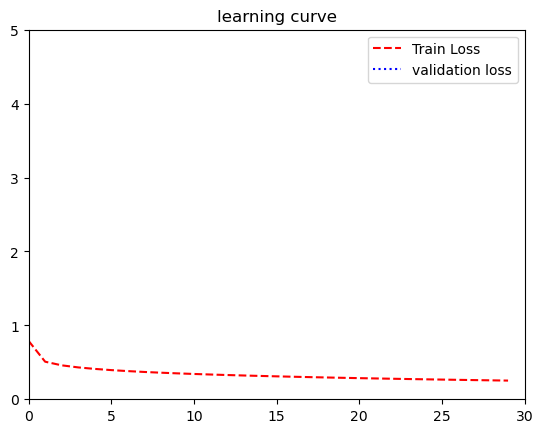

In [42]:
plt.title("learning curve")
plt.plot(train_loss, color='red', ls='--', label="Train Loss")
plt.plot(val_loss, color='b', ls=':', label="validation loss")
plt.xlim(0,30)
plt.ylim(0,5)
plt.legend()
plt.show()

In [43]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

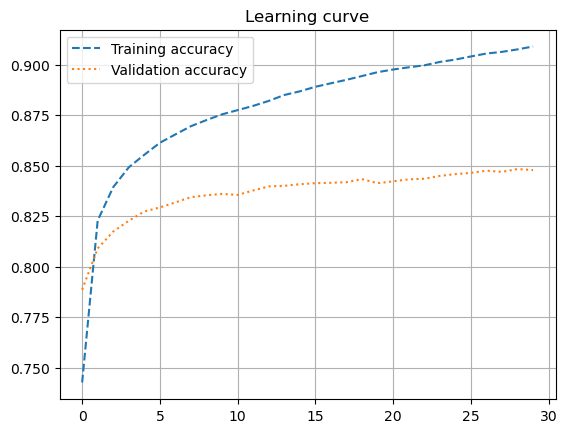

In [44]:
plt.title("Learning curve")
plt.plot(train_acc, ls="--", label="Training accuracy")
plt.plot(val_acc, ls=":", label="Validation accuracy")
plt.grid()
plt.legend()
plt.show()

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [46]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, X_val = X_train_full[:50000], X_train_full[50000:]
y_train, y_val = y_train_full[:50000], y_train_full[50000:]

In [47]:
tf.random.set_seed(190)

model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu')) 
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2),
    metrics = ["accuracy"]
)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val),callbacks=early_stopping)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7342 - loss: 0.8080 - val_accuracy: 0.8323 - val_loss: 0.4574
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8455 - loss: 0.4370 - val_accuracy: 0.8449 - val_loss: 0.4277
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8585 - loss: 0.3951 - val_accuracy: 0.8471 - val_loss: 0.4318
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8684 - loss: 0.3666 - val_accuracy: 0.8519 - val_loss: 0.4047
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8740 - loss: 0.3480 - val_accuracy: 0.8489 - val_loss: 0.4159
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8802 - loss: 0.3327 - val_accuracy: 0.8599 - val_loss: 0.3999
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8866 - loss: 0.3146 - val_accuracy: 0.8641 - val_loss: 0.3822
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8906 - loss: 0.3005 - 

In [48]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

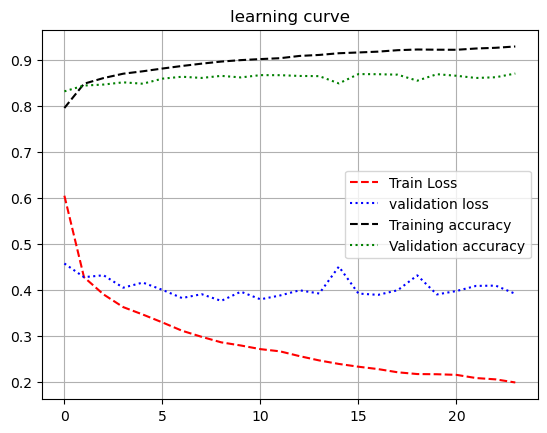

In [49]:
plt.title("learning curve")

plt.plot(train_loss, color='red', ls='--', label="Train Loss")
plt.plot(val_loss, color='b', ls=':', label="validation loss")

plt.plot(train_acc, ls="--",color='k' ,label="Training accuracy")
plt.plot(val_acc, ls=":", color='green',label="Validation accuracy")

plt.grid()
plt.legend()
plt.show()

In [50]:
# Regression -> california housing data set

In [34]:
data = tf.keras.datasets.california_housing.load_data()

In [35]:
(housing_train_full, housing_price_full), (housing_test, housing_price_test) = data

In [36]:
housing_train_full[:5]

array([[-1.18270e+02,  3.40900e+01,  5.20000e+01,  2.32700e+03,
         5.55000e+02,  1.04800e+03,  4.91000e+02,  3.78470e+00],
       [-1.18360e+02,  3.39600e+01,  2.10000e+01,  1.80200e+03,
         5.56000e+02,  1.28600e+03,  5.57000e+02,  2.72840e+00],
       [-1.22390e+02,  3.77600e+01,  5.20000e+01,  1.87700e+03,
         4.27000e+02,  7.12000e+02,  3.98000e+02,  3.97220e+00],
       [-1.17950e+02,  3.39200e+01,  1.10000e+01,  3.12700e+03,
         7.06000e+02,  1.59400e+03,  6.94000e+02,  4.34260e+00],
       [-1.22520e+02,  3.79200e+01,  2.40000e+01,  4.21000e+02,
         6.40000e+01,  1.63000e+02,  7.50000e+01,  1.45833e+01]],
      dtype=float32)

In [37]:
housing_price_full[:5]

array([252300., 146900., 290900., 141300., 500001.], dtype=float32)

In [38]:
from sklearn.model_selection import train_test_split

In [142]:
housing_train, housing_val, housing_train_price, housing_val_price = train_test_split(
    housing_train_full, houising_price_full,
    test_size=0.2, random_state=(42)
)

ValueError: too many values to unpack (expected 2)

In [24]:
housing_train.shape, housing_train_price.shape

NameError: name 'housing_train' is not defined

In [39]:
tf.random.set_seed(42)

In [40]:
model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=housing_train.shape[-1:]), # [8,]
    tf.keras.layers.Normalization(),
    #tf.keras.layers.Dense(100, activation='relu'),
    #tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [43]:
model.compile(
    optimizer = optimizer,
    loss = "mse",
    metrics = ["RootMeanSquaredError"]
)

In [44]:
model.layers[1].get_weights()

[]

In [45]:
model.layers[0].adapt(housing_train_full)

In [46]:
history = model.fit(housing_train_full, housing_price_full, epochs=30, validation_split=0.1)

Epoch 1/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - RootMeanSquaredError: 144637.3594 - loss: 22567919616.0000 - val_RootMeanSquaredError: 67773.0703 - val_loss: 4593188864.0000
Epoch 2/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 67135.8203 - loss: 4508992512.0000 - val_RootMeanSquaredError: 67130.9922 - val_loss: 4506569728.0000
Epoch 3/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 66512.5938 - loss: 4425650176.0000 - val_RootMeanSquaredError: 66620.0547 - val_loss: 4438232064.0000
Epoch 4/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 66137.4609 - loss: 4375906816.0000 - val_RootMeanSquaredError: 66184.2812 - val_loss: 4380359168.0000
Epoch 5/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 65849.6641 - loss: 4337925120.0000 - val_RootMeanSquaredError: 65851.7969 - val_loss: 4336459264.0000
Epoch 6/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 65586.6328 - loss: 4303367168.00

<Axes: >

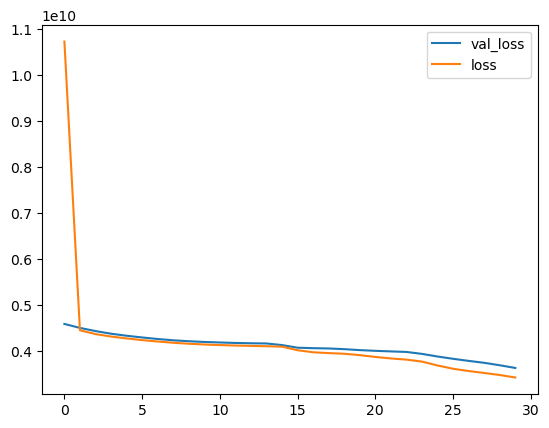

In [47]:
pd.DataFrame(history.history)[["val_loss", "loss"]].plot()

In [48]:
model.evaluate(housing_test, housing_price_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 60812.9141 - loss: 3699292416.0000


[3574717696.0, 59788.94140625]

In [49]:
59788/housing_price_test.mean()

0.2887007541059575

In [52]:
from time import sleep
n_seconds = 1*60
for _ in range(n_seconds):
    print("\rWe will start again in {} seconds. ".format(n_seconds-_),end="")
    sleep(1)

We will start again in 1 seconds:  